# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt

from matplotlib import cm
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from skimage.filters import threshold_otsu
from scipy import signal

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [2]:
def conv_fn(x, h):

    end = len(x) + 2*len(h)

    X_pad = np.zeros((end, ))
    #X_pad[0:len(x)] = x[0:len(x)]
    X_pad[len(h):len(h)+len(x)] = x[0:len(x)]
    #X_pad[len(x):end] = 0
    y = np.zeros((end, ))
    
    #print (X_pad)
    
    for n in range(0, len(X_pad)):
        for k in range (0, len(h)):
           y[n] = y[n] + X_pad[n-k]* h[k]
    
    return y

In [5]:
def dirac(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Place the dirac
    s[n] = 1
    
    return s

def step(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Create the ramp
    for idx_s in np.arange(n, N):
        s[idx_s] = 1
    
    return s

def exp(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    e = 2.71828
    # Create the ramp
    for incr, idx_s in enumerate(np.arange(n, N)):
        s[idx_s] = e ** incr
    
    return s



x = np.array([1, 2, 3, 4])
#h = np.array([-1,1])
#dirac, step and exponential all tested (with and/or without shifts)
h = dirac(0)
y = conv_fn(x, h)
print (y)
#Build-in convolution 1d function for result comparison
print (np.convolve(x, h))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  2.  3.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  2.  3.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [6]:
def conv2d_fn(x, h):
    #zero padding in both row and column direction
    endv = x.shape[0] + 2*h.shape[0]
    endh = x.shape[1] + 2*h.shape[1]
    #print (endv)
    #print (endh)
    X_pad = np.zeros((endv, endh))
    X_pad[h.shape[0]:h.shape[0] + x.shape[0],h.shape[1]:h.shape[1] + x.shape[1]] = x[:,:]

    y2d = np.zeros((X_pad.shape[0], X_pad.shape[1]))

    for n1 in range(0, X_pad.shape[0]):
        for n2 in range (0, X_pad.shape[1]):
            for k1 in range(0, h.shape[0]):
                for k2 in range (0, h.shape[1]): 
                    y2d[n1,n2] = y2d[n1,n2] + X_pad[n1-k1, n2-k2]* h[k1, k2]

    #y = np.zeros((endv, endh))
    #print (y2d)   
    return y2d

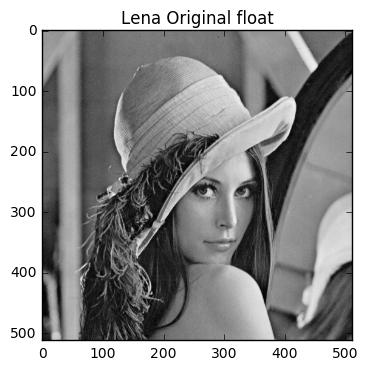

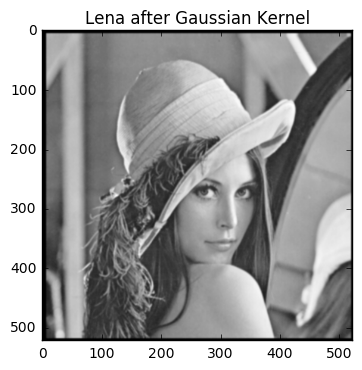

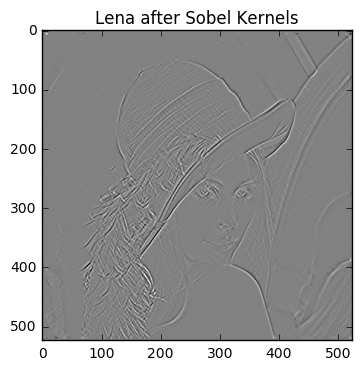

In [8]:
Path = '../images/'
image_name ='lena-grey.bmp'
lena_im = io.imread(Path.__add__(image_name))
lena_im = img_as_float(lena_im)

plt.figure
plt.imshow(lena_im, cmap=plt.cm.gray)
plt.title('Lena Original float')
plt.show() 
K = 1/256 * np.array([[1,4,6,4,1],[4, 16, 24, 16, 4],[6, 24,36,24,6],[4, 16, 24, 16, 4], [1,4,6,4,1]])
y2d = conv2d_fn(lena_im, K)

plt.figure
plt.imshow(y2d, cmap=plt.cm.gray)
plt.title('Lena after Gaussian Kernel')
plt.show() 

#Sobel matrices, both horizontal and vertical operations
sobel_1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

#Cascaded convolution:two conv2d in consecutive
y_sobel = conv2d_fn(conv2d_fn(lena_im, sobel_1), sobel_2)
plt.figure
plt.imshow(y_sobel, cmap=plt.cm.gray)
plt.title('Lena after Sobel Kernels')
plt.show()

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

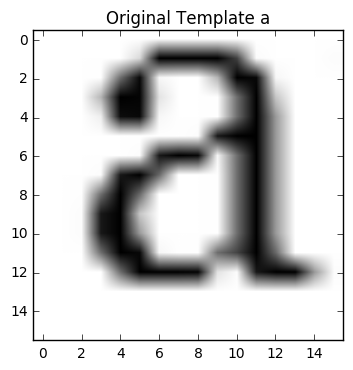

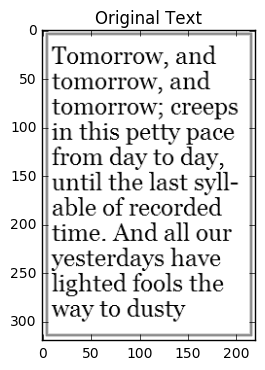

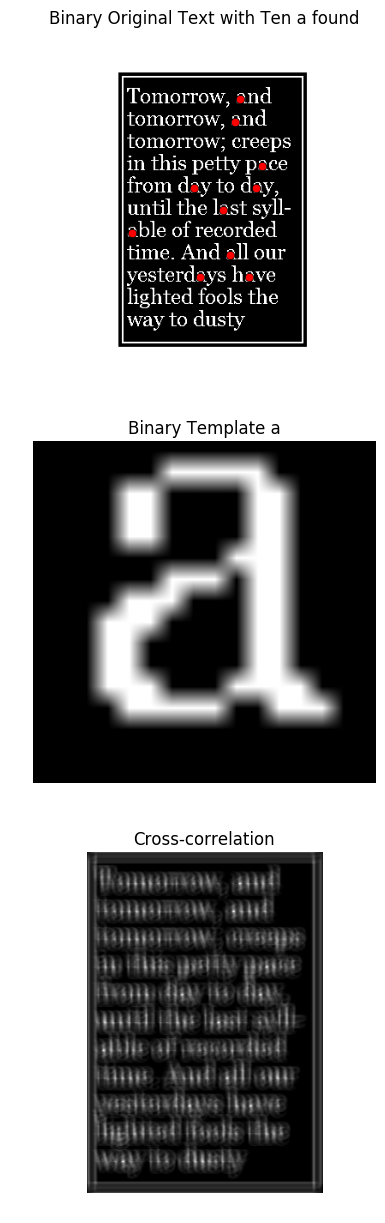

In [12]:
Path = '../images/'
image_name ='a.png'
a_im = io.imread(Path.__add__(image_name), as_grey = True)
a_im= img_as_float(a_im)

plt.figure()
plt.imshow(a_im, cmap=cm.Greys_r)
plt.title('Original Template a')
plt.show() 

Path = '../images/'
image_name ='text.png'
t_im = io.imread(Path.__add__(image_name),as_grey = True)
t_im = img_as_float(t_im)

plt.figure()
plt.imshow(t_im, cmap=cm.Greys_r)
plt.title('Original Text')
plt.show() 

s = threshold_otsu(a_im)
for i in range (a_im.shape[0]):
    for j in range (a_im.shape[1]):
        if a_im[i,j] > s:
            a_im[i,j] = 0
        else:
            a_im[i,j] =1


s = threshold_otsu(t_im)
for i in range (t_im.shape[0]):
    for j in range (t_im.shape[1]):
        if t_im[i,j] > s:    
            t_im[i,j] = 0
        else:
            t_im[i,j] =1


corr = signal.correlate2d(t_im,a_im, 'same', 'symm')

fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,figsize=(6, 15))

ax_template.imshow(a_im, cmap='gray')
ax_template.set_title('Binary Template a')
ax_template.set_axis_off() 
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.imshow(t_im, cmap='gray')
ax_orig.set_title('Binary Original Text with Ten a found')
ax_orig.set_axis_off()

for count in range (0, 10):
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    ax_orig.plot(x, y, 'ro')
    #Alter this score so that the position corresponding to the next highest correlation will be returned in the next iteration 
    corr[y, x] = 0
    